# Data Description: 

The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory. Data is in raw form (not scaled).The
data has 8 quantitative input variables, and 1 quantitative output variable, and 1030
instances (observations).

# Domain:

Cement manufacturing

# Context:

Concrete is the most important material in civil engineering. The concrete compressive
strength is a highly nonlinear function of age and ingredients. These ingredients include
cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine
aggregate.

# Attribute Information:

 Cement : measured in kg in a m3 mixture

 Blast : measured in kg in a m3 mixture

 Fly ash : measured in kg in a m3 mixture

 Water : measured in kg in a m3 mixture

 Superplasticizer : measured in kg in a m3 mixture

 Coarse Aggregate : measured in kg in a m3 mixture

 Fine Aggregate : measured in kg in a m3 mixture

 Age : day (1~365)

 Concrete compressive strength measured in MPa

# Learning Outcomes:

 Exploratory Data Analysis

 Building ML models for regression

 Hyper parameter tuning

# Objective:

Modeling of strength of high performance concrete using Machine Learning

# Steps and tasks:

1. Deliverable -1 (Exploratory data quality report reflecting the following) (20
marks)
a. Univariate analysis (5 marks)
i. Univariate analysis – data types and description of the independent
attributes which should include (name, meaning, range of values
observed, central values (mean and median), standard deviation and
quartiles, analysis of the body of distributions / tails, missing
values, outliers
b. Multivariate analysis (5 marks)
i. Bi-variate analysis between the predictor variables and between the
predictor variables and target column. Comment on your findings
in terms of their relationship and degree of relation if any. Presence
of leverage points. Visualize the analysis using boxplots and pair
plots, histograms or density curves. Select the most appropriate
attributes
c. Pick one strategy to address the presence outliers and missing values and
perform necessary imputation (10 marks)
2. Deliverable -2 (Feature Engineering techniques) (15 marks)
a. Identify opportunities (if any) to create a composite feature, drop a feature
b. Decide on complexity of the model, should it be simple linear model in
terms of parameters or would a quadratic or higher degree help
c. Explore for gaussians. If data is likely to be a mix of gaussians, explore
individual clusters and present your findings in terms of the independent
attributes and their suitability to predict strength
3. Deliverable -3 (create the model ) ( 15 marks)
a. Obtain feature importance for the individual features and present your
findings
4. Deliverable -4 (Tuning the model) (20 marks)
a. Algorithms that you think will be suitable for this project
b. Techniques employed to squeeze that extra performance out of the model
without making it overfit or underfit
c. Model performance range at 95% confidence level

# Deliverable -1 (Exploratory data quality report reflecting the following) 

In [1]:
# Import necessary library
# To enable plotting graphs in Jupyter Notebook
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
sns.set(style="ticks")

from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor

In [2]:
# Load dataset
df=pd.read_csv('concrete.csv')

In [3]:
df.head(50)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


'strength' is dependent variable and 'cement','slag','ash','water','superplastic','coaragg','fineagg' and 'age'are independent variable

In [4]:
df.shape

(1030, 9)

In [5]:
print(df.columns)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')


# a. Univariate analysis 

 i. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# Inferences:
1. In 'slag','ash' and 'superplastic' min value is zero.
2. In column "slag' and 'ash' there is large differnce between 50% and 75%. so can say that data is skewed.
3. In 'age' 75% is 56 and max value is 365. so it replies presence of outlier.

In [8]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [9]:
# We can say that there is no presence of missing values but number of zeros are present.

cement


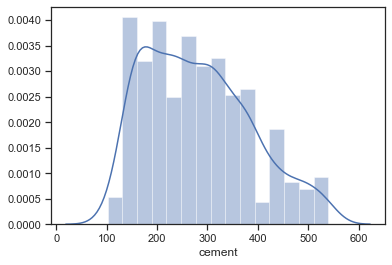

slag


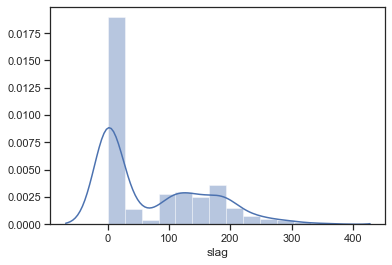

ash


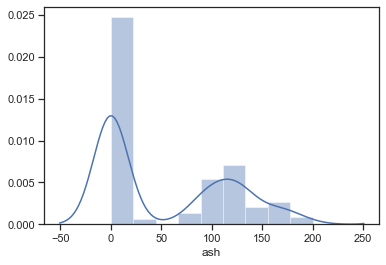

water


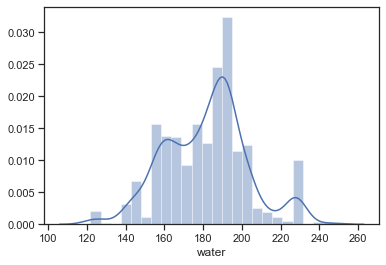

superplastic


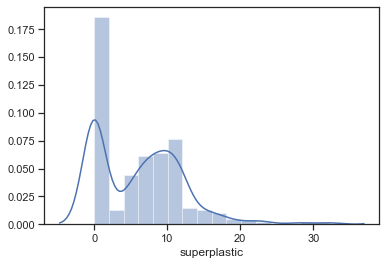

coarseagg


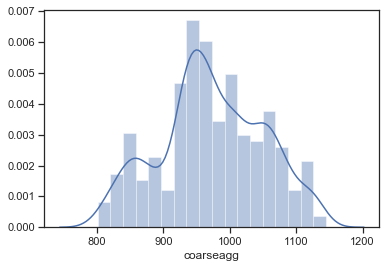

fineagg


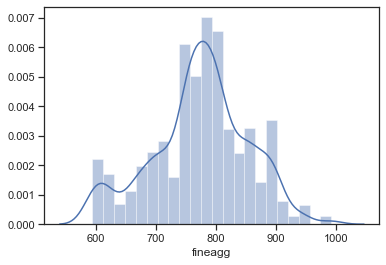

age


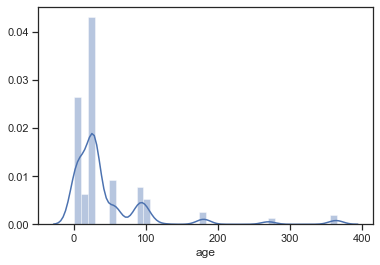

strength


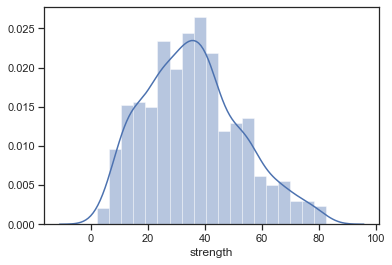

In [10]:
 l= list(df.columns.values) 
def plot(df):
    
    for col in l:
        #plt.hist(df[col])
        sns.distplot(df[col])
        print(col)
        plt.show()
    
    
plot(df)

# Observations:
1. From above plot we can say that 'cement','water' and 'strength' are uniformaly distributed.
2.'slag','ash','superplastic','age' are right skewed.
3. In 'age'most of the observations are between 0 to 100. Very few are above 100.    

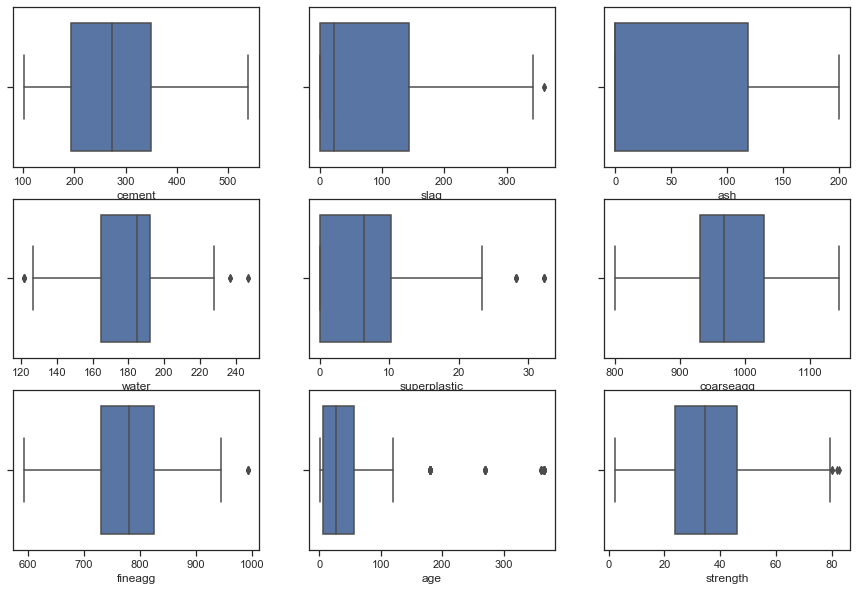

In [11]:
# # To find outliner need to plot boxplot
plt.figure(figsize=(15,10))
pos = 1
for i in df.columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(df[i])
    pos += 1 

In [12]:
# Observation:
#1.Presence of few outliner in 'slag','water','superplastic','fineagg'and 'strength'
#2.Most of the outliners are present in 'age'

# b. Multivariate analysis 

 i. Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes 

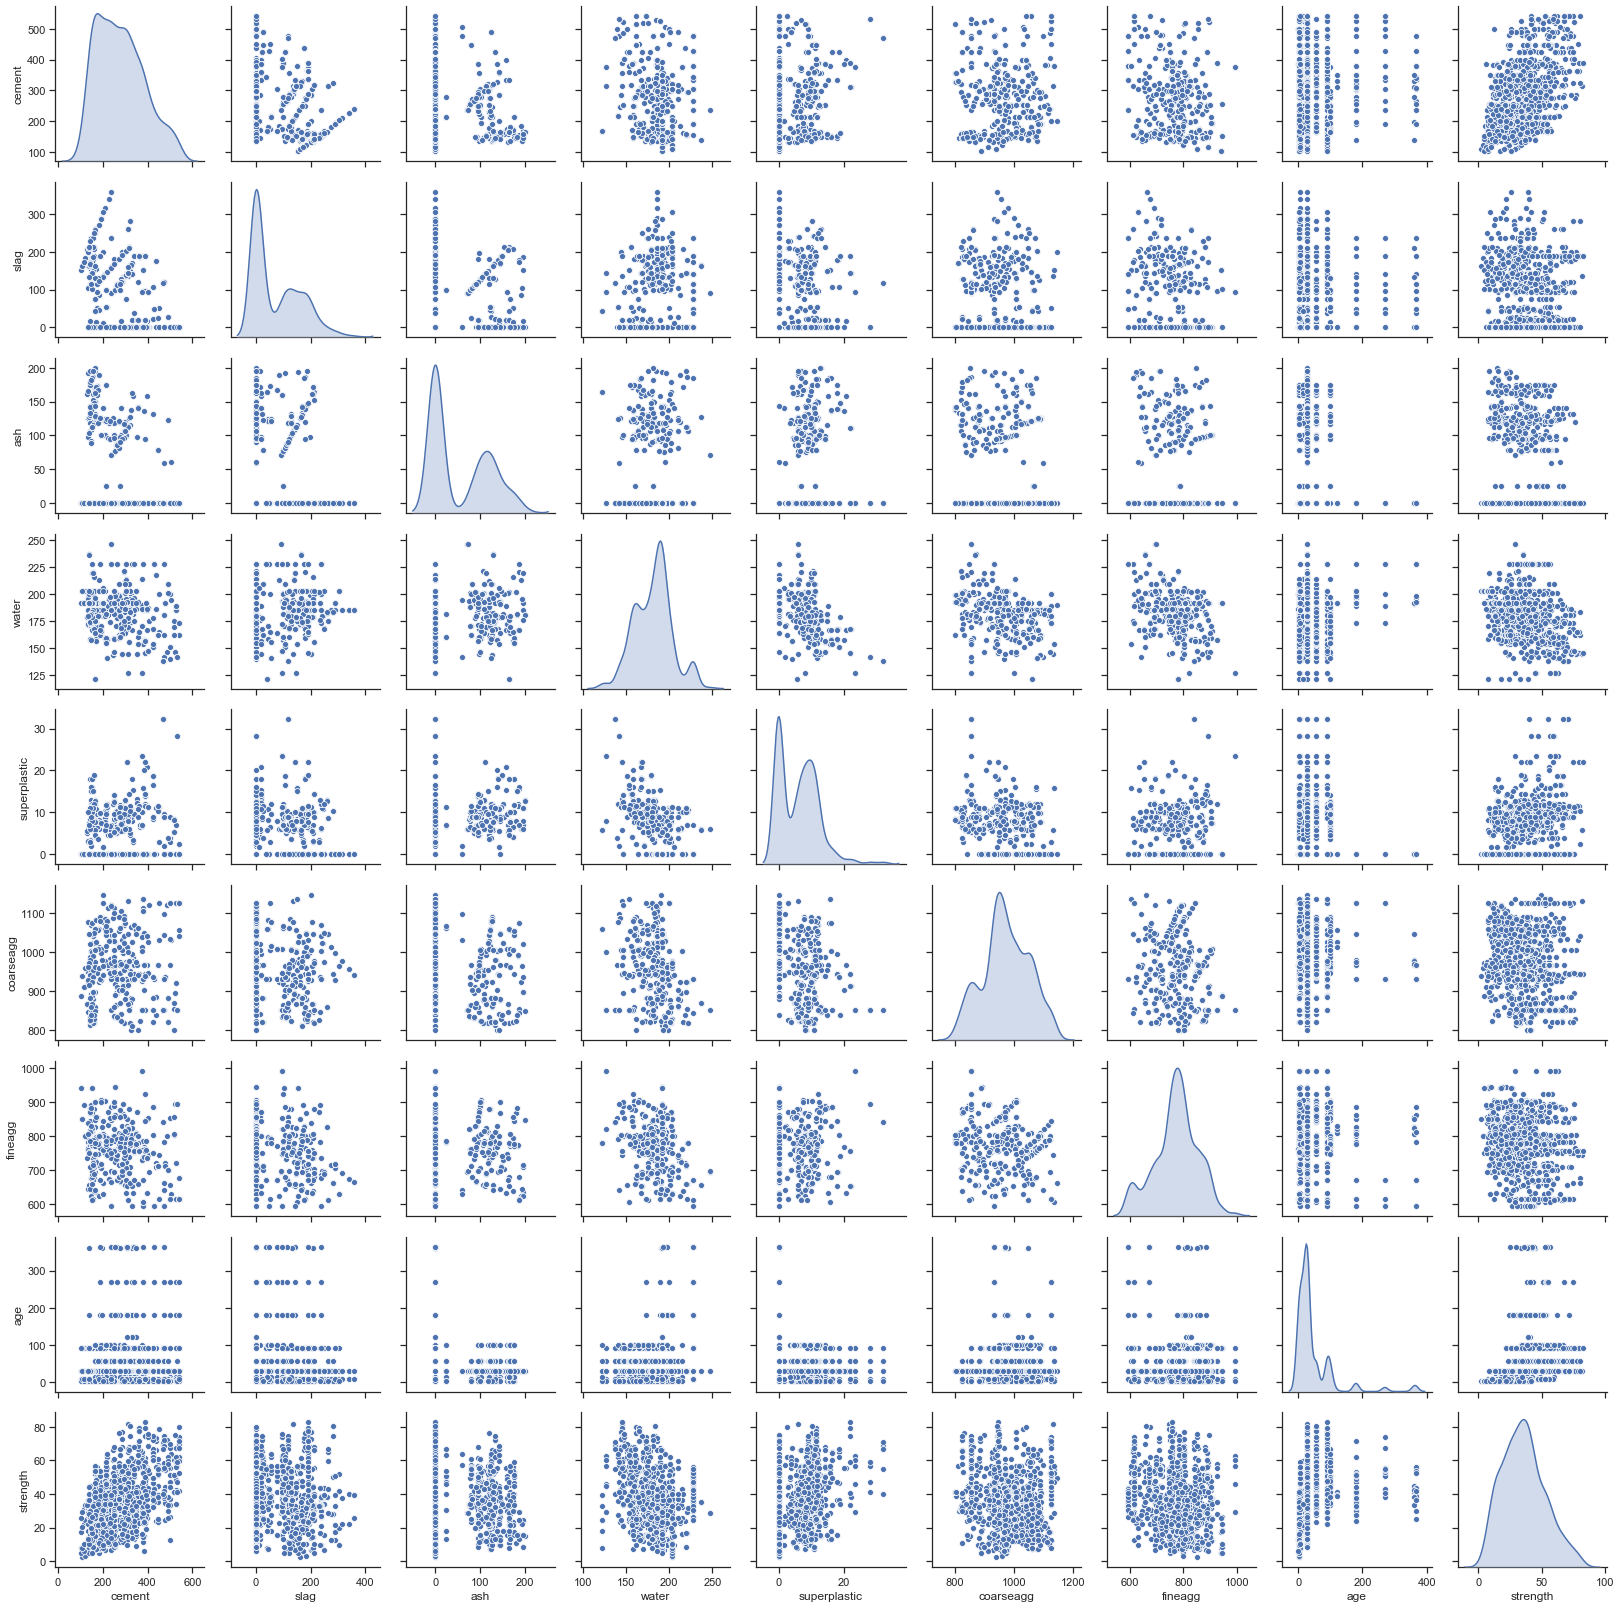

In [13]:
sns.pairplot(df,diag_kind='kde')

In [14]:
#Observation:
#1.cement is almost normal.
#2.slag and ash has two gausssians and rightly skewed.
#3.water has three guassians.
#4.superplastic has two gaussians and rightly skewed.
#5.coarseagg has three guassians and almost normal.
#6.fineagg has almost two guassians and looks like normal.
#7.age has multiple guassians and rightly skewed.
#8.Cemnt and strength showes positive linear relation.


In [15]:
# Check for correlation of variable
df.corr(method='pearson')

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


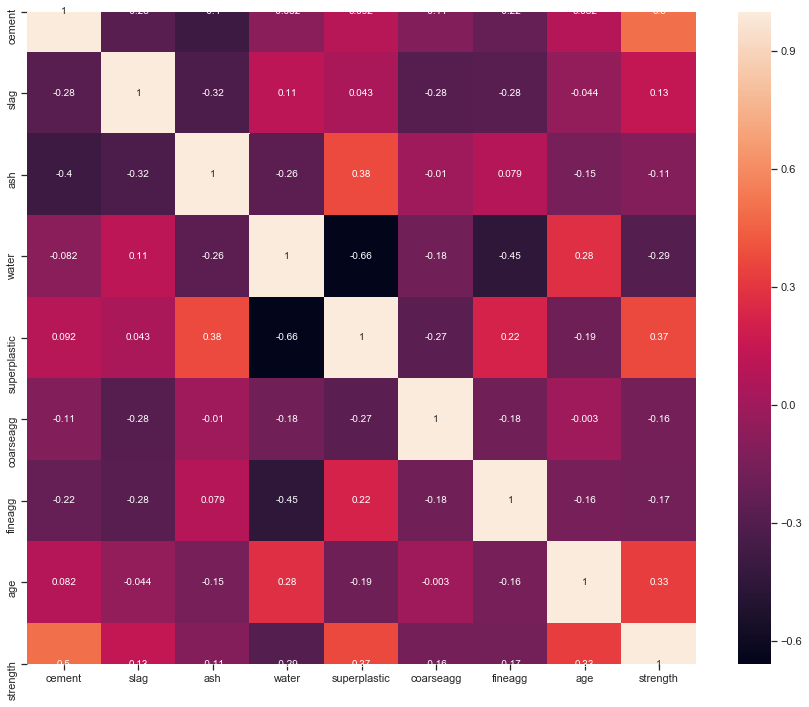

In [16]:
fig=plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True,)#correlation function

In [17]:
# Relation between different attributes
#1. There is high positive correlation between 'cement' and target attribute'strength'(0.5).
#2. Also there is positive relation between 'superplastic'and 'ash'.
#3.Positive relation between 'superplastic' and 'strength'
#4.'water'shows significant negative relationship with 'superplastic' and 'fineagg'.
#4.Other attributes does not give any strong relationship with 'strength'.

c. Pick one strategy to address the presence outliers and missing values and perform necessary imputation

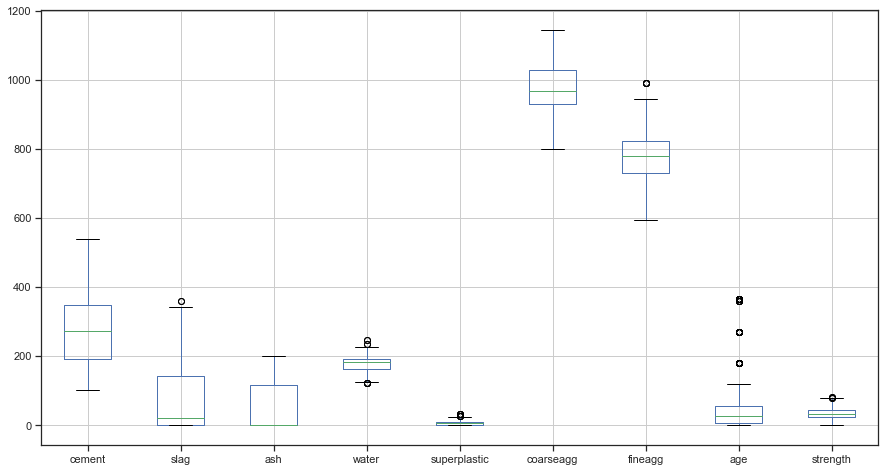

In [18]:
# To find outliner need to plot boxplot
df.boxplot(figsize=(15,8))

In [19]:
# Observation:
#1.Presence of few outliner in 'slag','water','superplastic','fineagg'and 'strength'
#2.Most of the outliners are present in 'age'

In [20]:
#Replacing the outliers by median
for col_name in df.columns[:-1]:
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    df.loc[(df[col_name] < low) | (df[col_name] > high), col_name] = df[col_name].median()

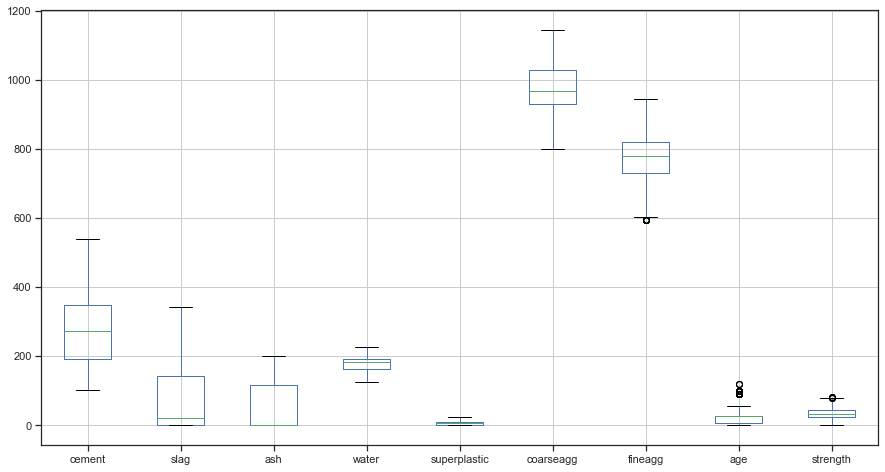

In [21]:
# again check for outliers in dataset using boxplot
df.boxplot(figsize=(15,8))

# Deliverable -2 (Feature Engineering techniques)

In [22]:
#Scaling the dataset
#Here, all the attributes in the same scale(unit) except the age attribute. 
#Hence, we are scaling the attributes. We are using zscore for scaling.

from scipy.stats import zscore
df1 = df.copy(deep=True)
df_z = df.apply(zscore)

In [23]:
#Splitting the data into independent and dependent attributes

X=df_z.iloc[:,0:-1]
y =df_z.iloc[:,-1]

In [24]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

# DecisionTree Regression

In [25]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

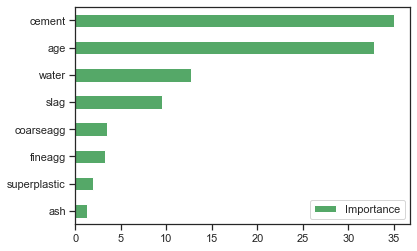

In [26]:
#printing the feature importance

Importance=pd.DataFrame({'Importance': dt_model.feature_importances_*100},index= X_train.columns)
Importance.sort_values('Importance',axis=0,ascending= True).plot(kind='barh',color='g')

In [27]:
# Observation:
# 1.From above we can say cement, age and water are significant attributes.
# And ash, coarseagg, fineagg, superplastic and slag are the less significant variable

In [28]:
y_pred = dt_model.predict(X_test)
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.9917907393004437
Performance on testing data using DT: 0.835264264468089
Accuracy DT:  0.835264264468089
MSE:  0.17196107641405695


Here, accuracy of training set is 99% and accuracy of test set is 84%. So the model is overfitting.

C:\Users\SUPRIYA\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


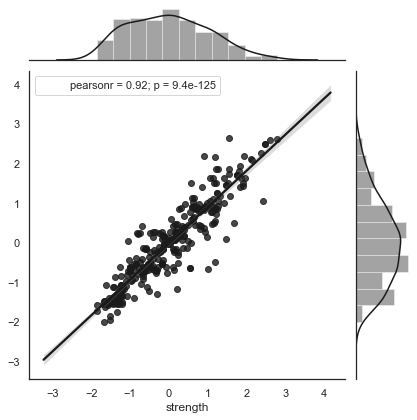

In [29]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [30]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT},index={'1'})
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.835264


# K fold cross validation

In [31]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8597285648947143
Standard Deviation:  0.04401533117061942


In [32]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree k fold'], 'accuracy': [accuracy]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.835264
2,Decision Tree k fold,0.859729


# Iteration 2

In [33]:
# Drop the least significant variable

In [34]:
#Create a copy of the dataset
df2=df_z.copy()

In [35]:
#independent and dependent variable
X = df2.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = df2['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [36]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

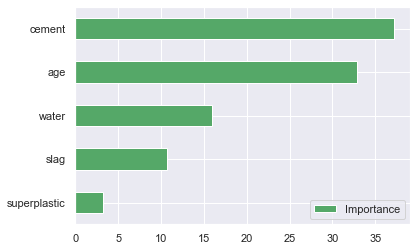

In [37]:
#printing the feature importance

Importance=pd.DataFrame({'Importance': dt_model.feature_importances_*100},index= X_train.columns)
Importance.sort_values('Importance',axis=0,ascending= True).plot(kind='barh',color='g')

In [38]:
y_pred = dt_model.predict(X_test)
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.991045963372976
Performance on testing data using DT: 0.8461043052556028
Accuracy DT:  0.8461043052556028
MSE:  0.16064558936339182


In [39]:
#the acuracy on testing dataset is not improved, still it is an overfit model.

C:\Users\SUPRIYA\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


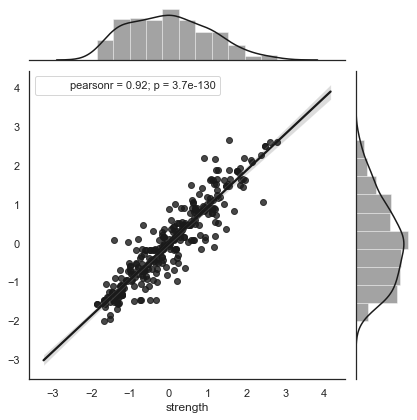

In [40]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [41]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree2'], 'accuracy': [acc_DT]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.835264
2,Decision Tree k fold,0.859729
3,Decision Tree2,0.846104


# Regularising/Pruning of Decision Tree

In [42]:
#Splitting the data into independent and dependent attributes

X=df_z.iloc[:,0:-1]
y =df_z.iloc[:,-1]

In [43]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [44]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [45]:
#printing the feature importance

print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
cement        0.416953
slag          0.025822
ash           0.000000
water         0.135128
superplastic  0.017987
coarseagg     0.000000
fineagg       0.007793
age           0.396318


Here, we can see that ash,coarseagg and fineagg are least significant variable.

In [46]:
y_pred = reg_dt_model.predict(X_test)
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.7255811799299218
Performance on testing data using DT: 0.6548277186105129
Accuracy DT:  0.6548277186105129
MSE:  0.36031160369896825


In [47]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree'], 'accuracy': [acc_RDT]},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.835264
2,Decision Tree k fold,0.859729
3,Decision Tree2,0.846104
4,Pruned Decision Tree,0.654828


# K fold cross validation

In [48]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(reg_dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.6819101662123233
Standard Deviation:  0.06252311979215476


In [49]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree k fold'], 'accuracy': [accuracy]},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.835264
2,Decision Tree k fold,0.859729
3,Decision Tree2,0.846104
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910


# Iteration2

In [50]:
#Create a copy of the dataset
df3=df_z.copy()

In [51]:
#independent and dependent variable
X = df3.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = df3['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [52]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [53]:
y_pred = reg_dt_model.predict(X_test)
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.7249584363084667
Performance on testing data using DT: 0.6634677033758938
Accuracy DT:  0.6634677033758938
MSE:  0.35129266754854116


In [54]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree2'], 'accuracy': [acc_RDT]},index={'6'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.835264
2,Decision Tree k fold,0.859729
3,Decision Tree2,0.846104
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468


# K Means Clustering

In [55]:
cluster_range = range( 1, 15 )  
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,3.709976e+07
1,2,2.774842e+07
2,3,2.141117e+07
3,4,1.881564e+07
4,5,1.657278e+07
5,6,1.516697e+07
6,7,1.359619e+07
7,8,1.247438e+07
8,9,1.174836e+07
9,10,1.048062e+07


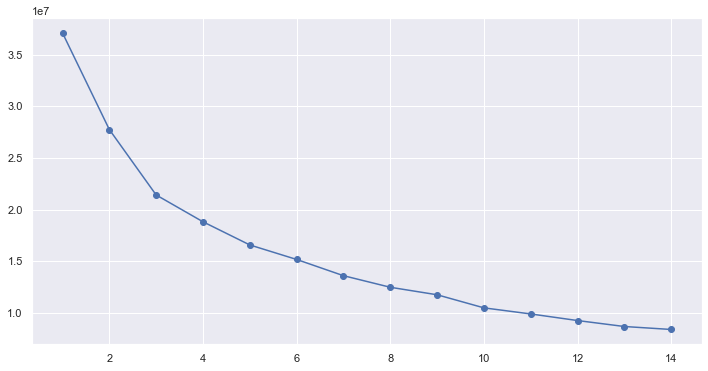

In [56]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [57]:
# k=6
cluster = KMeans( n_clusters = 6, random_state = 2354 )
cluster.fit(df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2354, tol=0.0001, verbose=0)

In [58]:
# Creating a new column "GROUP" which will hold the cluster id of each record
prediction=cluster.predict(df_z)
df_z["GROUP"] = prediction     
# Creating a mirror copy for later re-use instead of building repeatedly
df_z_copy = df_z.copy(deep = True)

In [59]:
centroids = cluster.cluster_centers_
centroids

array([[-0.52847035,  0.25047012,  1.10117943,  0.4707871 ,  0.51065443,
        -1.14464266, -0.34207299, -0.2243148 , -0.27815339],
       [-0.60282287, -0.65663952,  1.10691052, -0.61327163,  0.49168022,
         0.62337539,  0.43508059,  0.27502291, -0.13528454],
       [ 0.3112026 , -0.83641215, -0.78154411,  0.44337009, -1.00073639,
         0.49854218,  0.39671798, -0.24628184, -0.68238245],
       [-0.87010755,  1.41482728, -0.84485042,  0.60549346, -0.75810292,
        -0.0430217 , -0.16744124, -0.16350135, -0.56135812],
       [ 1.00454194,  0.50203623, -0.51368191, -1.01583295,  1.02698603,
        -0.6014763 ,  0.15987254,  0.07455196,  1.1935206 ],
       [ 1.45045591, -0.42924132, -0.69489669,  1.30649175, -1.00149369,
         0.19438938, -1.65956143,  0.15842921,  0.70494449]])

In [60]:
centroid_df = pd.DataFrame(centroids, columns = list(df) )
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-0.528470,0.250470,1.101179,0.470787,0.510654,-1.144643,-0.342073,-0.224315,-0.278153
1,-0.602823,-0.656640,1.106911,-0.613272,0.491680,0.623375,0.435081,0.275023,-0.135285
2,0.311203,-0.836412,-0.781544,0.443370,-1.000736,0.498542,0.396718,-0.246282,-0.682382
3,-0.870108,1.414827,-0.844850,0.605493,-0.758103,-0.043022,-0.167441,-0.163501,-0.561358
4,1.004542,0.502036,-0.513682,-1.015833,1.026986,-0.601476,0.159873,0.074552,1.193521
5,1.450456,-0.429241,-0.694897,1.306492,-1.001494,0.194389,-1.659561,0.158429,0.704944


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000692A751448>,
      dtype=object)

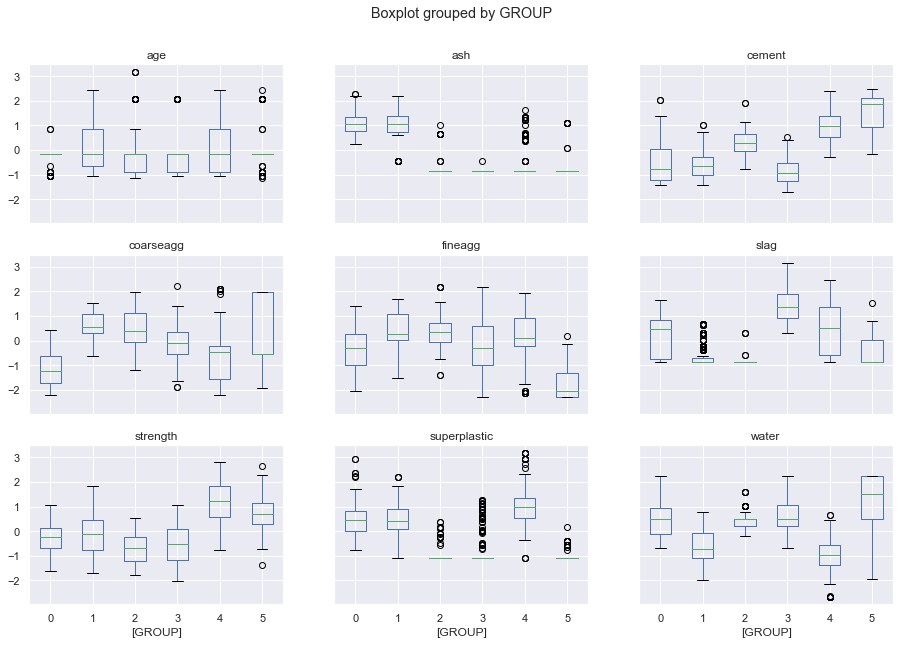

In [61]:
## Instead of interpreting the neumerical values of the centroids, let us do a visual analysis by converting the 
## centroids and the data in the cluster into box plots.
import matplotlib.pylab as plt
df_z.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10))

1.Here, None of the dimensions are good predictor of target variable.

2.For all the dimensions (variables) every cluster have a similar range of values except in one case.

3.We can see that the body of the cluster are overlapping.

4.So in k means, though, there are clusters in datasets on different dimensions. But we can not see any distinct characteristics of these clusters which tell us to break data into different clusters and build separate models for them.

In [62]:
#Splitting the data into independent and dependent attributes

X=df_z.iloc[:,0:-1]
y =df_z.iloc[:,-1]

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

# Random Forest Regressor

In [63]:
model=RandomForestRegressor()
model.fit(X_train, y_train)

C:\Users\SUPRIYA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [64]:
y_pred = model.predict(X_test)
print('Performance on training data using RFR:',model.score(X_train,y_train))
print('Performance on testing data using RFR:',model.score(X_test,y_test))
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using RFR: 0.9815855812484955
Performance on testing data using RFR: 0.8785893575750559
Accuracy DT:  0.8785893575750557
MSE:  0.2635275080906149


This model is also overfit.

In [65]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor'], 'accuracy': [acc_RFR]},index={'7'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.835264
2,Decision Tree k fold,0.859729
3,Decision Tree2,0.846104
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.878589


# K fold cross validation

In [66]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.952631553114909
Standard Deviation:  0.023693948870503512


In [67]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor k fold'], 'accuracy': [accuracy]},index={'8'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.835264
2,Decision Tree k fold,0.859729
3,Decision Tree2,0.846104
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.878589
8,Random Forest Regressor k fold,0.952632


# Gradient Boosting Regressor

In [68]:
model=GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [69]:
y_pred = model.predict(X_test)
print('Performance on training data using GBR:',model.score(X_train,y_train))
print('Performance on testing data using GBR:',model.score(X_test,y_test))
acc_GBR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_GBR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9782521540927335
Performance on testing data using GBR: 0.8816272475331269
Accuracy DT:  0.8816272475331269
MSE:  0.2569336250955643


In [70]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor'], 'accuracy': [acc_GBR]},index={'9'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.835264
2,Decision Tree k fold,0.859729
3,Decision Tree2,0.846104
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.878589
8,Random Forest Regressor k fold,0.952632
9,Gradient Boost Regressor,0.881627


# K fold cross validation

In [71]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.9392341724965311
Standard Deviation:  0.016413662124255306


In [72]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor k fold'], 'accuracy': [accuracy]},index={'10'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.835264
2,Decision Tree k fold,0.859729
3,Decision Tree2,0.846104
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.878589
8,Random Forest Regressor k fold,0.952632
9,Gradient Boost Regressor,0.881627
10,Gradient Boost Regressor k fold,0.939234


# Ada Boosting Regressor

In [73]:
model=AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [74]:
y_pred = model.predict(X_test)
print('Performance on training data using GBR:',model.score(X_train,y_train))
print('Performance on testing data using GBR:',model.score(X_test,y_test))
acc_ABR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_ABR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9125036954567852
Performance on testing data using GBR: 0.8512837243705271
Accuracy DT:  0.8512837243705271
MSE:  0.32279566886716443


In [75]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor'], 'accuracy': [acc_ABR]},index={'11'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.835264
2,Decision Tree k fold,0.859729
3,Decision Tree2,0.846104
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.878589
8,Random Forest Regressor k fold,0.952632
9,Gradient Boost Regressor,0.881627
10,Gradient Boost Regressor k fold,0.939234


# K fold cross validation

In [76]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8741421383666171
Standard Deviation:  0.016687342357152305


In [77]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor k fold'], 'accuracy': [accuracy]},index={'12'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.835264
2,Decision Tree k fold,0.859729
3,Decision Tree2,0.846104
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.878589
8,Random Forest Regressor k fold,0.952632
9,Gradient Boost Regressor,0.881627
10,Gradient Boost Regressor k fold,0.939234


# Bagging Regressor

In [78]:
model=BaggingRegressor()
model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [79]:
y_pred = model.predict(X_test)
print('Performance on training data using GBR:',model.score(X_train,y_train))
print('Performance on testing data using GBR:',model.score(X_test,y_test))
acc_BR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_BR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9850509629902873
Performance on testing data using GBR: 0.8445502446368085
Accuracy DT:  0.8445502446368085
MSE:  0.33741100323624595


In [80]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor'], 'accuracy': [acc_BR]},index={'13'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.835264
2,Decision Tree k fold,0.859729
3,Decision Tree2,0.846104
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.878589
8,Random Forest Regressor k fold,0.952632
9,Gradient Boost Regressor,0.881627
10,Gradient Boost Regressor k fold,0.939234


# K fold cross validation

In [81]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.9413577401628324
Standard Deviation:  0.02195291727776209


In [82]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor k fold'], 'accuracy': [accuracy]},index={'14'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.835264
2,Decision Tree k fold,0.859729
3,Decision Tree2,0.846104
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.878589
8,Random Forest Regressor k fold,0.952632
9,Gradient Boost Regressor,0.881627
10,Gradient Boost Regressor k fold,0.939234


# KNN Regressor

In [83]:
error=[]
for i in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Mean error')

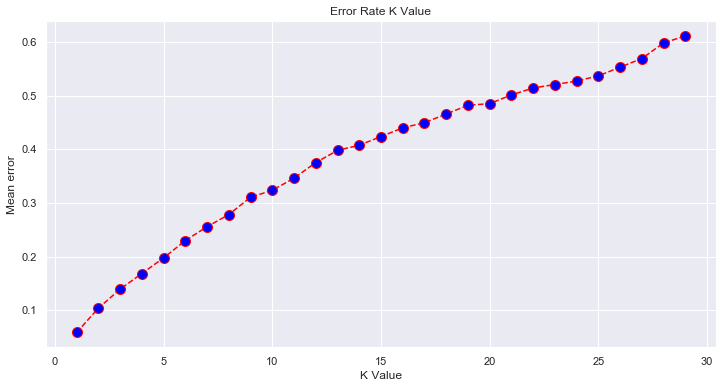

In [84]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30),error,color='red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [85]:
#k=3
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [86]:
y_pred = model.predict(X_test)
print('Performance on training data using KNNR:',model.score(X_train,y_train))
print('Performance on testing data using KNNR:',model.score(X_test,y_test))
acc_K=metrics.r2_score(y_test, y_pred)
print('Accuracy KNNR: ',acc_K)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using KNNR: 0.9703861686744812
Performance on testing data using KNNR: 0.8591850586581486
Accuracy KNNR:  0.8591850586581486
MSE:  0.3056454512765192


In [87]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor'], 'accuracy': [acc_K]},index={'15'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.835264
2,Decision Tree k fold,0.859729
3,Decision Tree2,0.846104
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.878589
8,Random Forest Regressor k fold,0.952632
9,Gradient Boost Regressor,0.881627
10,Gradient Boost Regressor k fold,0.939234


# K fold cross validation

In [88]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.930587489921801
Standard Deviation:  0.021128129960479206


In [89]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor k fold'], 'accuracy': [accuracy]},index={'16'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.835264
2,Decision Tree k fold,0.859729
3,Decision Tree2,0.846104
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.878589
8,Random Forest Regressor k fold,0.952632
9,Gradient Boost Regressor,0.881627
10,Gradient Boost Regressor k fold,0.939234


# Support Vector Regressor

In [90]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [91]:
y_pred = model.predict(X_test)
print('Performance on training data using SVR:',model.score(X_train,y_train))
print('Performance on testing data using SVR:',model.score(X_test,y_test))
acc_S=metrics.r2_score(y_test, y_pred)
print('Accuracy SVR: ',acc_S)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using SVR: 0.676179314667977
Performance on testing data using SVR: 0.5862701118185771
Accuracy SVR:  0.5862701118185771
MSE:  0.8980201758051045


In [92]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Support Vector Regressor'], 'accuracy': [acc_S]},index={'17'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.835264
2,Decision Tree k fold,0.859729
3,Decision Tree2,0.846104
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.878589
8,Random Forest Regressor k fold,0.952632
9,Gradient Boost Regressor,0.881627
10,Gradient Boost Regressor k fold,0.939234


# K fold cross validation

In [93]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.6315687675857757
Standard Deviation:  0.040580415384032995


In [94]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['SVR k fold'], 'accuracy': [accuracy]},index={'18'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.835264
2,Decision Tree k fold,0.859729
3,Decision Tree2,0.846104
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.878589
8,Random Forest Regressor k fold,0.952632
9,Gradient Boost Regressor,0.881627
10,Gradient Boost Regressor k fold,0.939234


# Ensemeble KNN Regressor, SVR, LR

In [95]:
#Multiple model Ensemble
from sklearn import svm
LR=LinearRegression()
KN=KNeighborsRegressor(n_neighbors=3)
SVM=svm.SVR(kernel='linear')

In [96]:
evc=VotingRegressor(estimators=[('LR',LR),('KN',KN),('SVM',SVM)])
evc.fit(X_train, y_train)

VotingRegressor(estimators=[('LR',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('KN',
                             KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=3,
                                                 p=2, weights='uniform')),
                            ('SVM',
                             SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='linear', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False))],
                n_jobs=None, weights=None)

In [97]:
y_pred = evc.predict(X_test)
print('Performance on training data using ensemble:',evc.score(X_train,y_train))
print('Performance on testing data using ensemble:',evc.score(X_test,y_test))
acc_E=metrics.r2_score(y_test, y_pred)
print('Accuracy ensemble: ',acc_E)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using ensemble: 0.847251607904815
Performance on testing data using ensemble: 0.7666408492870319
Accuracy ensemble:  0.7666408492870319
MSE:  0.506517009129144


In [98]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ensemble'], 'accuracy': [acc_E]},index={'19'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.835264
2,Decision Tree k fold,0.859729
3,Decision Tree2,0.846104
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.878589
8,Random Forest Regressor k fold,0.952632
9,Gradient Boost Regressor,0.881627
10,Gradient Boost Regressor k fold,0.939234


# K fold cross validation

In [99]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(evc,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.815962897756223
Standard Deviation:  0.02300809766438322


In [100]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ensemble k fold'], 'accuracy': [accuracy]},index={'20'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.835264
2,Decision Tree k fold,0.859729
3,Decision Tree2,0.846104
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.878589
8,Random Forest Regressor k fold,0.952632
9,Gradient Boost Regressor,0.881627
10,Gradient Boost Regressor k fold,0.939234


- After applying all the models we can see that Random Forest Regressor, Random Forest Regressor k fold, Gradient Boost Regressor, Gradient Boost Regressor k fold, Bagging Regressor are giving better results as compared to other models.
- Now as the dataset have different gaussians, we can apply k means clustering and then we can apply the models and compare the accuracy.

# Bootstrap Sampling

In [101]:
values = df.values

In [102]:
# Number of bootstrap samples to create
n_iterations = 100       
# size of a bootstrap sample
n_size = int(len(df_z) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    gbmTree = GradientBoostingRegressor(n_estimators=50)
    # fit against independent variables and corresponding target values
    gbmTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set
    y_test = test[:,-1]    
    
    # evaluate model
    # predict based on independent variables in the test data

    predictions = gbmTree.predict(test[:, :-1])  
    score = gbmTree.score(test[:, :-1] ,y_test)
    print(score)
    stats.append(score)

0.8323582942983944
0.8367467425365647
0.8496397635800249
0.8290196279697761
0.8443964100542193
0.8689040539939785
0.8214989705812625
0.8474689177395299
0.8212161380227379
0.8390667323022755
0.8187008412684131
0.8554989347896109
0.8417566141307172
0.8593093663749798
0.8505337774402875
0.8572593933504294
0.8778685083271971
0.8094425720358803
0.8642921427285896
0.8626766035100569
0.8430627543660325
0.8464198766538569
0.8558932905773008
0.8031357276191304
0.8463139037255445
0.8557410043919652
0.8529792661078979
0.8740945627207666
0.836459319531742
0.8467224062710739
0.8450791040454705
0.8523679038359956
0.8540060399435562
0.846958121044029
0.8436701479853042
0.8470990224554723
0.8345243197390814
0.835247160865507
0.8615594973558256
0.8553084481543244
0.8537605495702796
0.8349592127081362
0.8391494493382636
0.8261116637567757
0.8422465863435536
0.8435216995757554
0.845031067619787
0.8424599482990577
0.8516167059687004
0.8384205384764101
0.826993492887861
0.8446219325001992
0.782403223410542

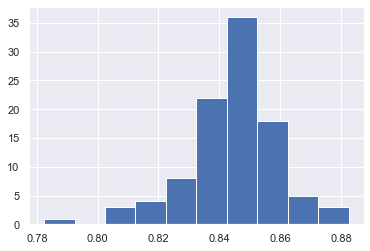

95.0 confidence interval 80.9% and 87.2%


In [103]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

95.0 confidence interval 80.9% and 87.2%

# Using Random Forest Regressor

In [104]:
values = df.values

In [105]:
values = df.values
# Number of bootstrap samples to create
n_iterations = 100       
# size of a bootstrap sample
n_size = int(len(df_z) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    rfTree = RandomForestRegressor(n_estimators=100)
    # fit against independent variables and corresponding target values
    rfTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
   
    predictions = rfTree.predict(test[:, :-1])
    score = rfTree.score(test[:, :-1] , y_test)
    print(score)
    stats.append(score)

0.8654097905463766
0.8731305895052007
0.879166599111686
0.8761081028617205
0.8625428819785154
0.8572526612730066
0.8921087832223114
0.869922290432196
0.8607627796934727
0.9073245370230507
0.8767177308364962
0.8713134102248139
0.9105075728401789
0.8805534272052562
0.8616937959362743
0.8750475397913227
0.8650043967331511
0.8927000833396154
0.8396720913288586
0.8806371791675772
0.8687215753281589
0.8759274444553518
0.8781560425350083
0.8526399332626748
0.8887644727294934
0.9047761192685927
0.8850795296032032
0.8755028170096852
0.8815074362708883
0.8814549807785095
0.8802903630627834
0.8656660565245322
0.8660664942022211
0.9033609916305909
0.881839269318275
0.8723720346626946
0.8774494032808443
0.9015125726718141
0.8912222714544332
0.8850184130635198
0.8989733851121658
0.8934963048647795
0.8507911737745365
0.8827438028168304
0.9097177382992522
0.8688166760767151
0.8839003053135641
0.8895716278575848
0.870626547125403
0.8859109829458404
0.8769160012007019
0.8191612043571698
0.88950810907783

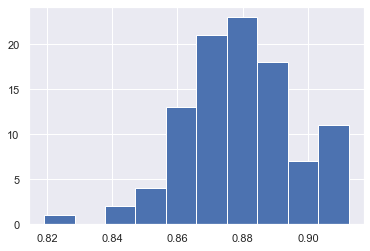

95.0 confidence interval 84.5% and 91.0%


In [106]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

95.0 confidence interval 84.5% and 91.0%
The bootstrap random forest classification model performance is between 84.5%-91.0% which is better than other classification algorithms.